/Users/saumikdana/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


https://finance.yahoo.com/calendar/earnings/?day=2024-07-03&offset=0&size=100


/Users/saumikdana/Stock_Selector/scripts/scrape_url.py:15: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(table))[0]


https://finance.yahoo.com/calendar/earnings/?day=2024-07-03&offset=100&size=100


/Users/saumikdana/Stock_Selector/scripts/scrape_url.py:40: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  ticker_data = pd.concat(ticker_data_list, ignore_index=True)


Options data for STZ:
Average IV for Calls: 0.31182202391350405
Average IV for Puts: 0.3078683248266512
Total Call Volume: 3239.0
Total Call open interest: 13850
Total Call engagement: 17089.0
Total Put Volume: 1267.0
Total Put open interest: 16660
Total Put engagement: 17927.0
Number of ITM Call Options: 74
Number of ITM Put Options: 30
Number of OTM Call Options: 100
Number of OTM Put Options: 107


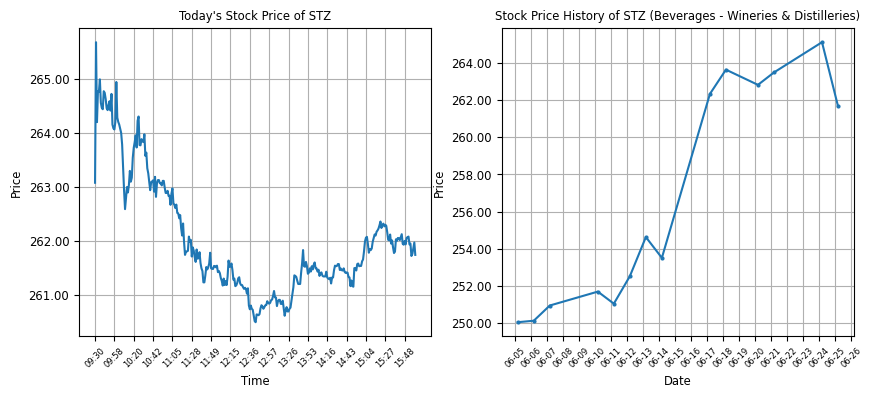

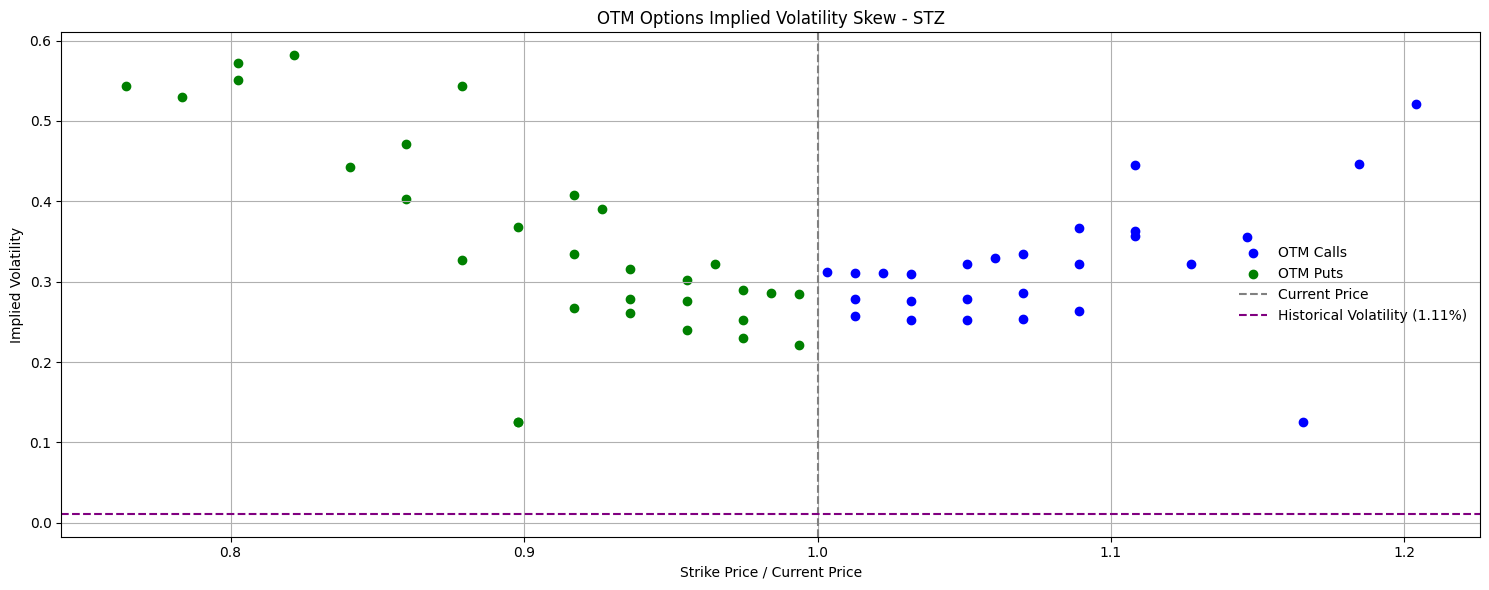

Options data for ADP:
Average IV for Calls: 0.3039745684162264
Average IV for Puts: 0.3050723311669485
Total Call Volume: 1454.0
Total Call open interest: 16510
Total Call engagement: 17964.0
Total Put Volume: 1508.0
Total Put open interest: 13146
Total Put engagement: 14654.0
Number of ITM Call Options: 49
Number of ITM Put Options: 31
Number of OTM Call Options: 75
Number of OTM Put Options: 81


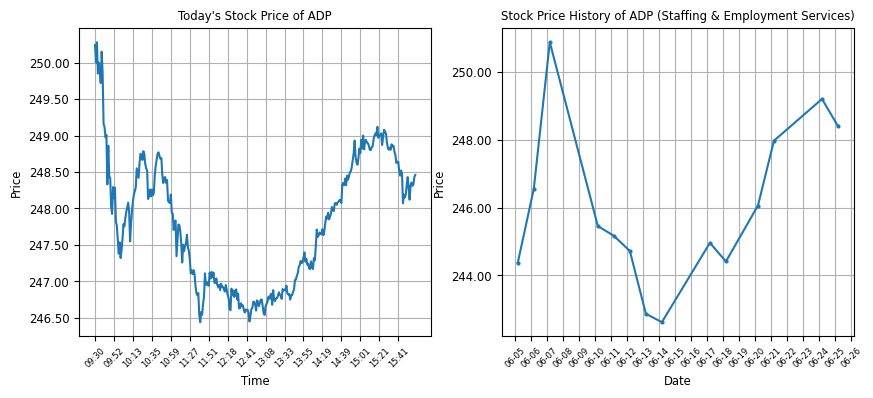

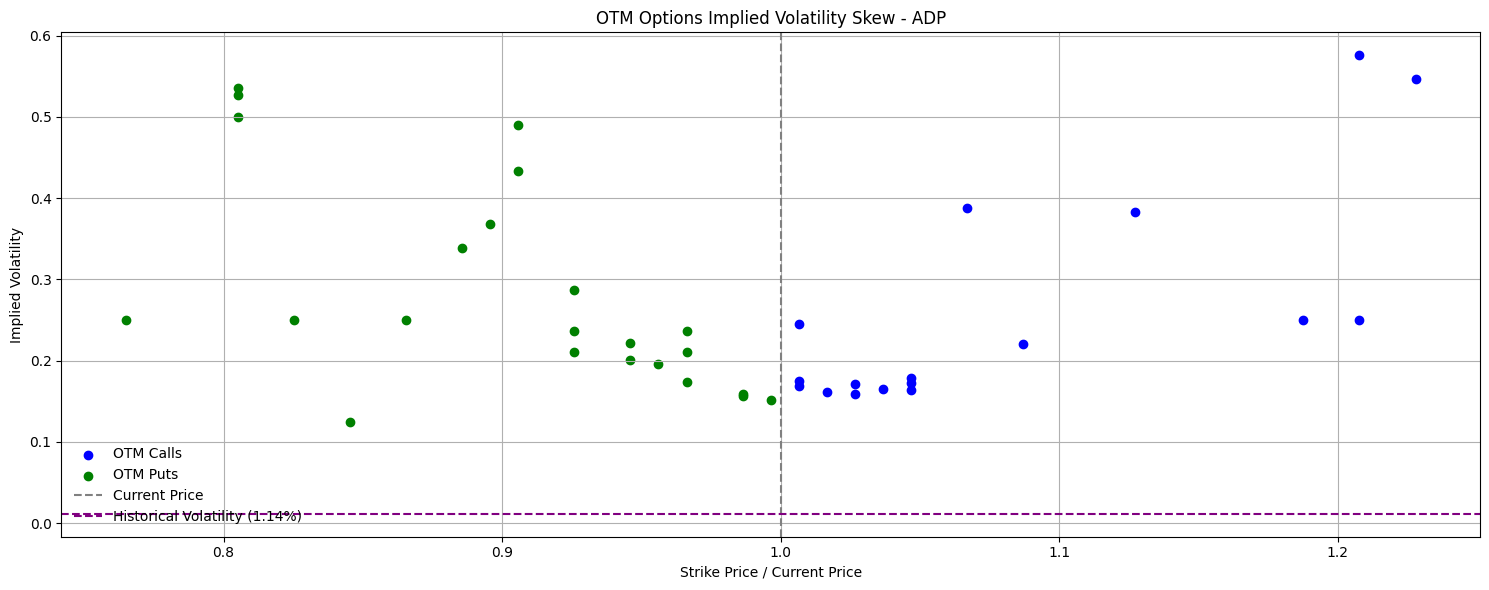

Options data for RY:
Average IV for Calls: 0.32021960711669917
Average IV for Puts: 0.27717550224304194
Total Call Volume: 320
Total Call open interest: 11848
Total Call engagement: 12168
Total Put Volume: 253.0
Total Put open interest: 7138.0
Total Put engagement: 7391.0
Number of ITM Call Options: 17
Number of ITM Put Options: 7
Number of OTM Call Options: 13
Number of OTM Put Options: 17


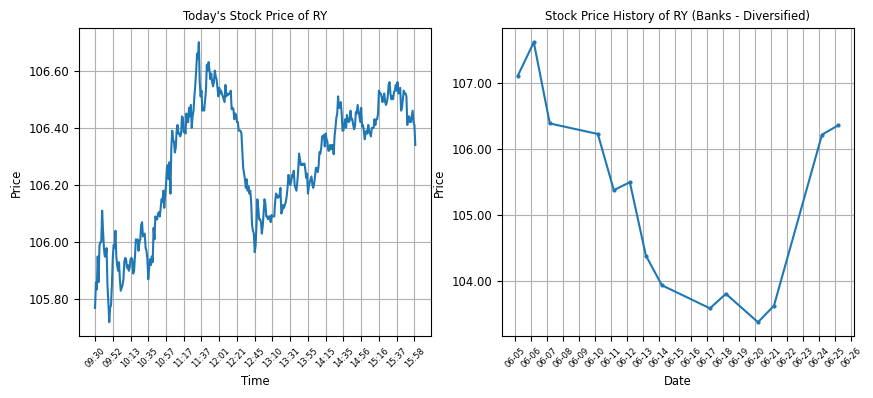

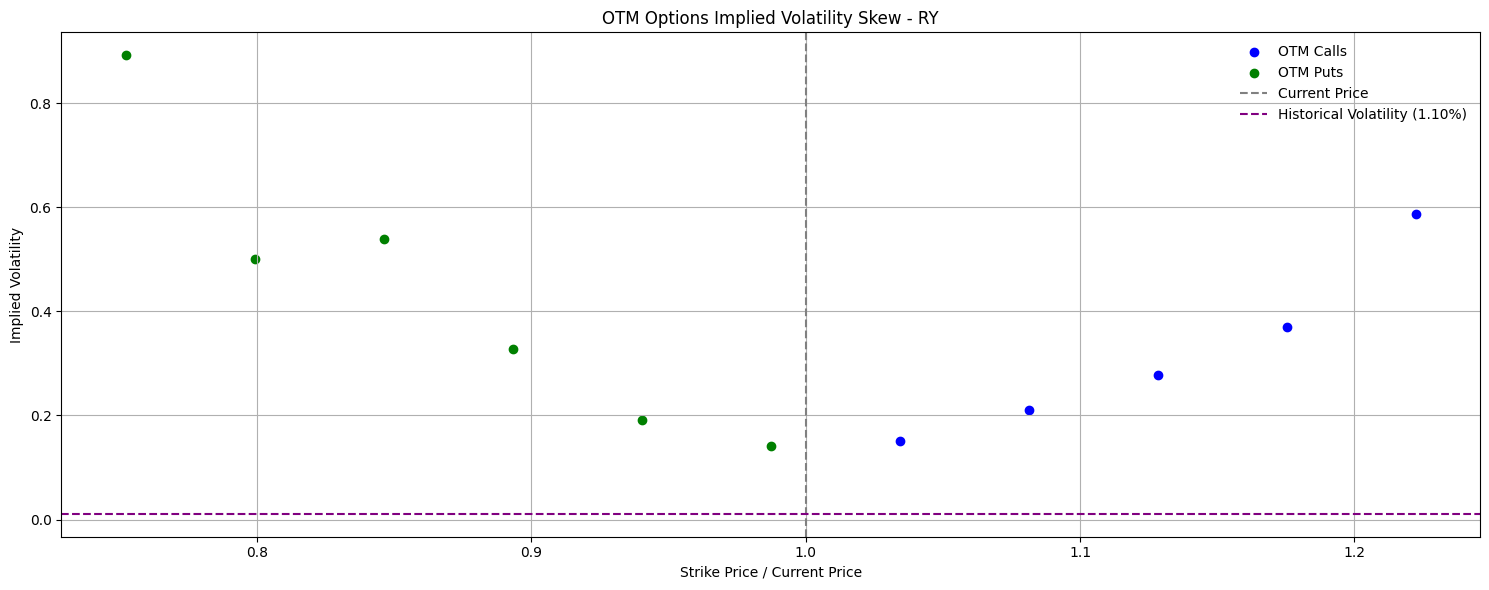

Options data for MAMA:
Average IV for Calls: 0.6679073131510419
Average IV for Puts: 0.6168663492838543
Total Call Volume: 501.0
Total Call open interest: 7805.0
Total Call engagement: 8306.0
Total Put Volume: 154
Total Put open interest: 590
Total Put engagement: 744
Number of ITM Call Options: 8
Number of ITM Put Options: 3
Number of OTM Call Options: 7
Number of OTM Put Options: 9


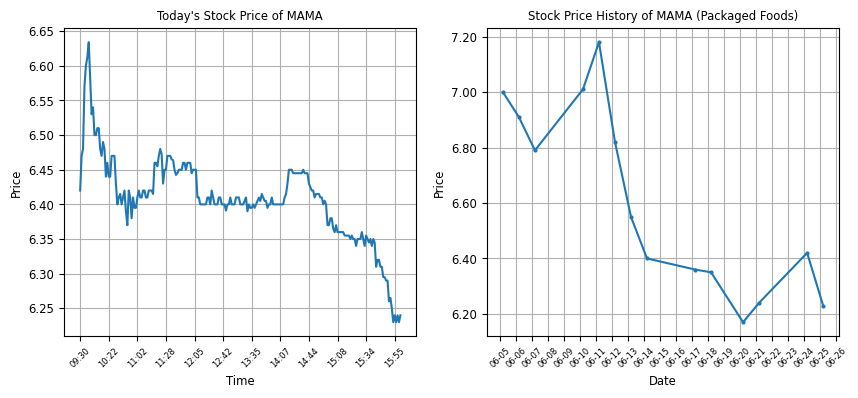

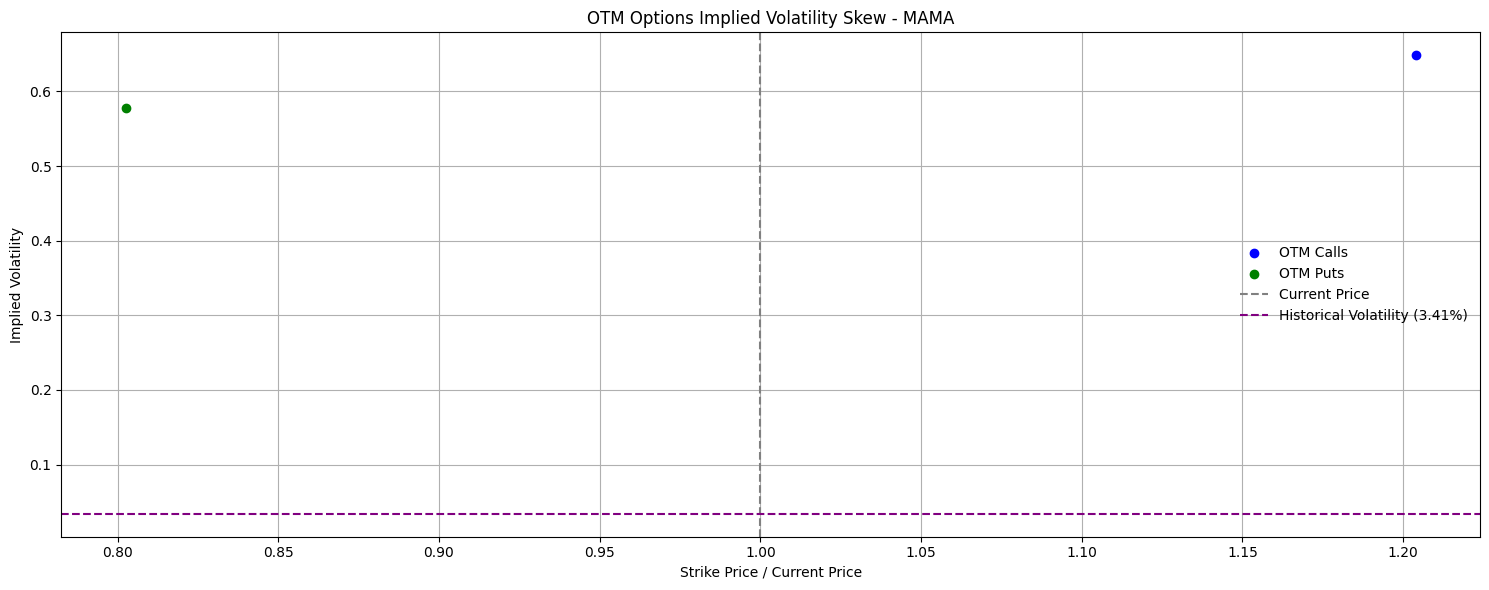

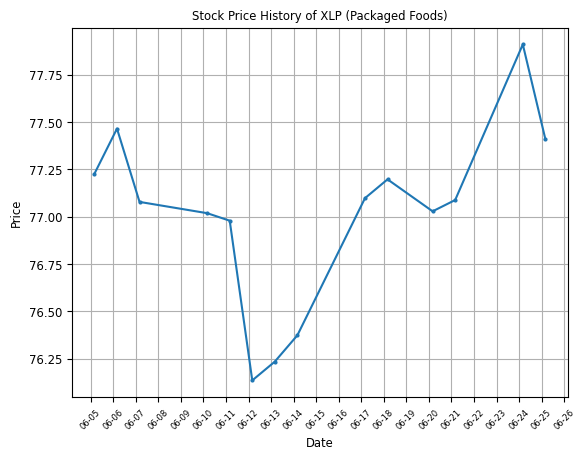

In [1]:
import setup
from imports import *
from scripts.analyze_stock import *  
from scripts.scrape_url import *
from scripts.plotting_routines import *

day = '2024-07-03'
date = datetime.strptime(day, '%Y-%m-%d')

# Set the time frame
end_date = date
start_date = date - timedelta(days=28)

ticker_data_list = []
base_url = 'https://finance.yahoo.com/calendar/earnings/?day=' + day

offset = 0
while True:
    url = f"{base_url}&offset={offset}&size=100"
    print(url)
    table = extract_table(url)
    
    if table is None:
        break

    ticker_data_list = process_earnings_table(table, ticker_data_list)
    offset += 100  # Increment the offset by 100 for the next iteration

ticker_data_sorted = convert_to_dataframe(ticker_data_list)

filtered_tickers = []

# Iterate through the sorted list of tickers
for index, row in ticker_data_sorted.iterrows():
    ticker = row['Symbol']
    
    if ticker in filtered_tickers:
        continue

    # Use the function from utils.py to analyze stock options
    options_metrics = analyze_stock_options(ticker)
    
    if options_metrics['total_itm_calls'] == 0 and options_metrics['total_itm_puts'] == 0:
        continue

    # Get All Analysis
    print_options_data(ticker, options_metrics)

    # Call the plot_stock_history method
    plot_stock_history(ticker, start_date, end_date)

    # IV Skew
    plot_iv_skew_otm_only(options_metrics, end_date, ticker)

    # Sector ETF Time Series
    plot_etf_historical_data(ticker, start_date, end_date)

    # Filtered tickers
    filtered_tickers.append(ticker)
    
del filtered_tickers, ticker_data_list, ticker_data_sorted


